In [1]:
import tweepy
import os
from dotenv import load_dotenv
#activamos el entorno para poder conectar el jupyter y extraer las variables
load_dotenv()
import pandas as pd
import re
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [2]:
API_KEY = os.getenv("API_KEY")
API_SECRET = os.getenv("API_SECRET")
ACCESS_TOKEN = os.getenv("ACCESS_TOKEN")
ACCESS_TOKEN_SECRET = os.getenv("ACCESS_TOKEN_SECRET")

In [3]:
auth = tweepy.OAuthHandler(API_KEY, API_SECRET) #Esta es la forma de autenticarnos mediante tweepy
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET) 
api = tweepy.API(auth)

In [4]:
api.__dict__

{'auth': <tweepy.auth.OAuthHandler at 0x7fed657c6790>,
 'host': 'api.twitter.com',
 'search_host': 'search.twitter.com',
 'upload_host': 'upload.twitter.com',
 'api_root': '/1.1',
 'search_root': '',
 'upload_root': '/1.1',
 'cache': None,
 'compression': False,
 'retry_count': 0,
 'retry_delay': 0,
 'retry_errors': None,
 'timeout': 60,
 'wait_on_rate_limit': False,
 'wait_on_rate_limit_notify': False,
 'parser': <tweepy.parsers.ModelParser at 0x7fed60c6edf0>,
 'proxy': {}}

In [5]:
!pip install "requests[security]"

In [7]:
df = pd.DataFrame(columns=["Date","User","IsVerified","Tweet","Likes","RT",'User_location'])
print(df)

Empty DataFrame
Columns: [Date, User, IsVerified, Tweet, Likes, RT, User_location]
Index: []


In [31]:
Topic=["covid"]
i=0
for tweet in tweepy.Cursor(api.search, q=Topic, lang="en",exclude='retweets').items():
    print(i, end='\r')
    print(tweet._json)
    

{'created_at': 'Wed Jun 09 16:25:03 +0000 2021', 'id': 1402663040076615685, 'id_str': '1402663040076615685', 'text': 'Covid-19 is shattering Europe’s claims to have some of the world’s most liveable cities https://t.co/IaeXHemRY4 via… https://t.co/i33Ncwun9R', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/IaeXHemRY4', 'expanded_url': 'https://www.bloomberg.com/news/articles/2021-06-09/europe-s-cities-slump-in-liveability-index-as-auckland-tops-list-kppnneka', 'display_url': 'bloomberg.com/news/articles/…', 'indices': [88, 111]}, {'url': 'https://t.co/i33Ncwun9R', 'expanded_url': 'https://twitter.com/i/web/status/1402663040076615685', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://www.hootsuite.com" rel="nofollow">Hootsuite Inc.</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'i

{'created_at': 'Wed Jun 09 16:24:58 +0000 2021', 'id': 1402663018081685509, 'id_str': '1402663018081685509', 'text': "@MDaware @megtirrell @ScottGottliebMD 400 *unvaccinated* people dying per day.\n\nI'm sorry, but I just don't buy the… https://t.co/4mguhMGMQy", 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'MDaware', 'name': 'Seth Trueger', 'id': 309124612, 'id_str': '309124612', 'indices': [0, 8]}, {'screen_name': 'megtirrell', 'name': 'Meg Tirrell', 'id': 47678782, 'id_str': '47678782', 'indices': [9, 20]}, {'screen_name': 'ScottGottliebMD', 'name': 'Scott Gottlieb, MD', 'id': 40156330, 'id_str': '40156330', 'indices': [21, 37]}], 'urls': [{'url': 'https://t.co/4mguhMGMQy', 'expanded_url': 'https://twitter.com/i/web/status/1402663018081685509', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://mobile.twitter.com" rel="

{'created_at': 'Wed Jun 09 16:24:52 +0000 2021', 'id': 1402662994270580736, 'id_str': '1402662994270580736', 'text': 'Researchers from #IITDelhi, along with KSBS, and DU’s Acharya Narendra Dev College, have asserted that the possibil… https://t.co/BHuOmF1Jrz', 'truncated': True, 'entities': {'hashtags': [{'text': 'IITDelhi', 'indices': [17, 26]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/BHuOmF1Jrz', 'expanded_url': 'https://twitter.com/i/web/status/1402662994270580736', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 19897138, 'id_str': '19897138', 'name': 'IndiaToday', 'screen_name': 'IndiaToday', 'location': 'Ind

{'created_at': 'Wed Jun 09 16:24:47 +0000 2021', 'id': 1402662974020489217, 'id_str': '1402662974020489217', 'text': 'Sir, those Indian \'journalists\' who write these "mock-India" articles are aghast with shocks of recovered situation… https://t.co/KtP4Rxso0v', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/KtP4Rxso0v', 'expanded_url': 'https://twitter.com/i/web/status/1402662974020489217', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 749511219778813952, 'id_str': '749511219778813952', 'name': 'Arun Walie', 'screen_name': 'arun_walie', 'location': '', 'descr

{'created_at': 'Wed Jun 09 16:24:41 +0000 2021', 'id': 1402662946686210051, 'id_str': '1402662946686210051', 'text': "Victoria Covid updates: Source of Melbourne's Delta strain outbreak found https://t.co/3tWg8vZ7nd", 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/3tWg8vZ7nd', 'expanded_url': 'https://www.news.com.au/world/coronavirus/australia/melbournes-lockdown-set-to-end-this-week-despite-spike-in-cases/news-story/0c98902b30f934e19016e5ce23880935', 'display_url': 'news.com.au/world/coronavi…', 'indices': [74, 97]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 219301263, 'id_str': '219301263', 'name': 'sun-go☆', 'screen_name'

{'created_at': 'Wed Jun 09 16:24:37 +0000 2021', 'id': 1402662931721039872, 'id_str': '1402662931721039872', 'text': 'Happening on Saturday, June 12th @MarcGarneauCI : COVID-19 Vaccine Clinic.  No appointment required and eligibility… https://t.co/0BxnEyRMAK', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'MarcGarneauCI', 'name': 'Marc Garneau Collegiate Institute', 'id': 1296850626559856640, 'id_str': '1296850626559856640', 'indices': [33, 47]}], 'urls': [{'url': 'https://t.co/0BxnEyRMAK', 'expanded_url': 'https://twitter.com/i/web/status/1402662931721039872', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen

{'created_at': 'Wed Jun 09 16:24:33 +0000 2021', 'id': 1402662914251702272, 'id_str': '1402662914251702272', 'text': 'Turdo shoots himself in the foot again, as it fails to dawn on him that extending the Covid Emergency Powers means… https://t.co/PDDfc6gW26', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/PDDfc6gW26', 'expanded_url': 'https://twitter.com/i/web/status/1402662914251702272', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [116, 139]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 4472437222, 'id_str': '4472437222', 'name': 'Conachair', 'screen_name': 'sugaracre', 'location': "Where I'm at", 'description': "It's comin' 

{'created_at': 'Wed Jun 09 16:24:29 +0000 2021', 'id': 1402662896920825861, 'id_str': '1402662896920825861', 'text': 'UN human rights experts call for equal access of Covid-19 vaccines in global\xa0south https://t.co/mm19KPVin9', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/mm19KPVin9', 'expanded_url': 'https://bangladesh.timesofnews.com/breaking-news/un-human-rights-experts-call-for-equal-access-of-covid-19-vaccines-in-global-south.html', 'display_url': 'bangladesh.timesofnews.com/breaking-news/…', 'indices': [83, 106]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://publicize.wp.com/" rel="nofollow">WordPress.com</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1092120433476792321, 'id_str': '1092120433476792321', 'name': 'Middle-East &

{'created_at': 'Wed Jun 09 16:24:26 +0000 2021', 'id': 1402662885516484608, 'id_str': '1402662885516484608', 'text': '@MiAirports do you offer pre flight COVID testing for flights to the UK at LIN? If so what is the cost and how long… https://t.co/e3Hkqv70vN', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'MiAirports', 'name': 'Milan Airports', 'id': 556691710, 'id_str': '556691710', 'indices': [0, 11]}], 'urls': [{'url': 'https://t.co/e3Hkqv70vN', 'expanded_url': 'https://twitter.com/i/web/status/1402662885516484608', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': 556691710, 'in_reply_to_user_id_str': '556691710', 'in_reply_to_screen_name': 'MiAirports', 'user': {

{'created_at': 'Wed Jun 09 16:24:20 +0000 2021', 'id': 1402662860648456197, 'id_str': '1402662860648456197', 'text': 'A great decision to save industries and businesses impacted by the Covid-19 pandemic! https://t.co/CNFuGuySqf', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1402662848959033347, 'id_str': '1402662848959033347', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/E3dCbfPXMAMmxRu.jpg', 'media_url_https': 'https://pbs.twimg.com/media/E3dCbfPXMAMmxRu.jpg', 'url': 'https://t.co/CNFuGuySqf', 'display_url': 'pic.twitter.com/CNFuGuySqf', 'expanded_url': 'https://twitter.com/TrevorIndia/status/1402662860648456197/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 544, 'h': 680, 'resize': 'fit'}, 'large': {'w': 1080, 'h': 1350, 'resize': 'fit'}, 'medium': {'w': 960, 'h': 1200, 'resize': 'fit'}}}]}, 'extended_entities': {'media': [{'id': 140266284895903

{'created_at': 'Wed Jun 09 16:24:18 +0000 2021', 'id': 1402662851194535936, 'id_str': '1402662851194535936', 'text': "Of course, all in the hands of Boris and Covid 19 guidelines!  But let's live in hope 🙏", 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': 1402644339810095105, 'in_reply_to_status_id_str': '1402644339810095105', 'in_reply_to_user_id': 256949220, 'in_reply_to_user_id_str': '256949220', 'in_reply_to_screen_name': 'David_Redfearn', 'user': {'id': 256949220, 'id_str': '256949220', 'name': 'David Redfearn', 'screen_name': 'David_Redfearn', 'location': 'London', 'description': 'Internationally renowned close-up and stand-up magician. Resident Magician at Chelsea FC for 27 years. https://t.co/MqiXxX8Vfp', 'url': 'https://t.co/DnxlxgAc36', 'entities': {'url

{'created_at': 'Wed Jun 09 16:24:14 +0000 2021', 'id': 1402662833918287874, 'id_str': '1402662833918287874', 'text': "@InLonelyLands @politicalmath Exactly. I would have taken it being a rather young and healthy person, I'm at little… https://t.co/o8WJWTHNf0", 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'InLonelyLands', 'name': '🧬📚 Alexandra 🏞', 'id': 1326292361014509569, 'id_str': '1326292361014509569', 'indices': [0, 14]}, {'screen_name': 'politicalmath', 'name': 'PoliMath', 'id': 36667104, 'id_str': '36667104', 'indices': [15, 29]}], 'urls': [{'url': 'https://t.co/o8WJWTHNf0', 'expanded_url': 'https://twitter.com/i/web/status/1402662833918287874', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': 1402662164641443840, 'in_reply_to_status

{'created_at': 'Wed Jun 09 16:24:10 +0000 2021', 'id': 1402662815949860872, 'id_str': '1402662815949860872', 'text': 'The pandemic wasn\'t an MAE but it breached IOCs?   Does "ordinary course" mean ordinary for a pandemic, or ordinary… https://t.co/AYD5YxgZhF', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/AYD5YxgZhF', 'expanded_url': 'https://twitter.com/i/web/status/1402662815949860872', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1093566288, 'id_str': '1093566288', 'name': 'Talks On Law', 'screen_name': 'TalksOnLaw', 'location': 'Manhattan, NYC', 'description': 'Law 

{'created_at': 'Wed Jun 09 16:24:06 +0000 2021', 'id': 1402662800334278657, 'id_str': '1402662800334278657', 'text': 'DKT WomanCare and Shanghai Dahua Pharmaceutical Reduce Price of Levoplant™ to $6.70, Increasing Affordability for F… https://t.co/fBdq2caGZO', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/fBdq2caGZO', 'expanded_url': 'https://twitter.com/i/web/status/1402662800334278657', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://dlvrit.com/" rel="nofollow">dlvr.it</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 976297820532518914, 'id_str': '976297820532518914', 'name': 'Latest News from Business Wire', 'screen_name': 'NewsFromBW', 'location': '', 'description': '

{'created_at': 'Wed Jun 09 16:24:02 +0000 2021', 'id': 1402662785318895616, 'id_str': '1402662785318895616', 'text': '🧵 Yesterday I accompanied two people to get their COVID vaccine. One was through @OttawaHealth while the other was… https://t.co/LpEGprekN9', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'OttawaHealth', 'name': 'Ottawa Public Health', 'id': 84366480, 'id_str': '84366480', 'indices': [81, 94]}], 'urls': [{'url': 'https://t.co/LpEGprekN9', 'expanded_url': 'https://twitter.com/i/web/status/1402662785318895616', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [116, 139]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 33781682

{'created_at': 'Wed Jun 09 16:23:58 +0000 2021', 'id': 1402662764951130112, 'id_str': '1402662764951130112', 'text': '178 hospital workers in Texas suspended for refusing to get COVID-19 vaccine https://t.co/Z2cAiL8meR via @nypost', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'nypost', 'name': 'New York Post', 'id': 17469289, 'id_str': '17469289', 'indices': [105, 112]}], 'urls': [{'url': 'https://t.co/Z2cAiL8meR', 'expanded_url': 'https://nypost.com/2021/06/09/texas-hospital-workers-suspended-for-refusing-covid-vaccine/?utm_source=twitter_sitebuttons&utm_medium=site%20buttons&utm_campaign=site%20buttons', 'display_url': 'nypost.com/2021/06/09/tex…', 'indices': [77, 100]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_use

{'created_at': 'Wed Jun 09 16:23:52 +0000 2021', 'id': 1402662740708282371, 'id_str': '1402662740708282371', 'text': 'Fewer cashiers and more futuristic checkout options are coming soon to a store near you https://t.co/tL0Wxdr3Om', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/tL0Wxdr3Om', 'expanded_url': 'https://trib.al/mV9f200', 'display_url': 'trib.al/mV9f200', 'indices': [88, 111]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 606571099, 'id_str': '606571099', 'name': 'Bloomberg Australia', 'screen_name': 'BloombergAU', 'location': 'Sydney', 'description': 'The official Twitter account for Bloomberg @business in Australia. Follow for the l

{'created_at': 'Wed Jun 09 16:23:48 +0000 2021', 'id': 1402662726095286272, 'id_str': '1402662726095286272', 'text': 'Here though, the image accompanying this article by @georgiahitch for @abcautralia is just a #headlesspreggo for an… https://t.co/I2iAPka0Xj', 'truncated': True, 'entities': {'hashtags': [{'text': 'headlesspreggo', 'indices': [93, 108]}], 'symbols': [], 'user_mentions': [{'screen_name': 'GeorgiaHitch', 'name': 'Georgia Hitch', 'id': 240226001, 'id_str': '240226001', 'indices': [52, 65]}], 'urls': [{'url': 'https://t.co/I2iAPka0Xj', 'expanded_url': 'https://twitter.com/i/web/status/1402662726095286272', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': 1402662724262301698, 'in_reply_to_status_id_str': '1402662724262301698', 'in_reply_to_user_id': 1385672536067911681, 'in_reply

{'created_at': 'Wed Jun 09 16:23:43 +0000 2021', 'id': 1402662705639604241, 'id_str': '1402662705639604241', 'text': 'Ayyyy first dose of the covid vaccination is done finally !!', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 960818578604863488, 'id_str': '960818578604863488', 'name': '☆~Dove92~☆', 'screen_name': 'DOVE92official', 'location': '', 'description': '▮🍹Nickname: Kitty▮🎮Huge Game Fanatic▮♀️Trans MtF/LGBTQ+ Supporter!▮💕@juice_mov my wonderful beloved uwu▮🖌Art Fan▮', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 77, 'friends_count': 219, 'list

{'created_at': 'Wed Jun 09 16:23:39 +0000 2021', 'id': 1402662686039580675, 'id_str': '1402662686039580675', 'text': '@medlifecare @pharmeasyapp @medlifecare @pharmeasyapp \n\nEGFR, Ferritin which was a common test there is no report,… https://t.co/xd4bsJ8ot0', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'medlifecare', 'name': 'medlifecare', 'id': 4419252914, 'id_str': '4419252914', 'indices': [0, 12]}, {'screen_name': 'pharmeasyapp', 'name': 'PharmEasy App', 'id': 3059540124, 'id_str': '3059540124', 'indices': [13, 26]}, {'screen_name': 'medlifecare', 'name': 'medlifecare', 'id': 4419252914, 'id_str': '4419252914', 'indices': [27, 39]}, {'screen_name': 'pharmeasyapp', 'name': 'PharmEasy App', 'id': 3059540124, 'id_str': '3059540124', 'indices': [40, 53]}], 'urls': [{'url': 'https://t.co/xd4bsJ8ot0', 'expanded_url': 'https://twitter.com/i/web/status/1402662686039580675', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [116, 

{'created_at': 'Wed Jun 09 16:23:34 +0000 2021', 'id': 1402662665747525633, 'id_str': '1402662665747525633', 'text': 'UST has announced that the company will continue to pay the salary of the associates who have lost their lives to C… https://t.co/XCVWspMI1Z', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/XCVWspMI1Z', 'expanded_url': 'https://twitter.com/i/web/status/1402662665747525633', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 69215674, 'id_str': '69215674', 'name': 'Tinu Cherian @ UST', 'screen_name': 'TinuTheCherian', 'location': 'Bangalore, India', 'description'

{'created_at': 'Wed Jun 09 16:23:31 +0000 2021', 'id': 1402662652548157443, 'id_str': '1402662652548157443', 'text': '#Covid19Update One Hundred Eighty Seven (187) patients have recovered and have been released from hospital, bringin… https://t.co/oXeKiGR7XN', 'truncated': True, 'entities': {'hashtags': [{'text': 'Covid19Update', 'indices': [0, 14]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/oXeKiGR7XN', 'expanded_url': 'https://twitter.com/i/web/status/1402662652548157443', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 94399647, 'id_str': '94399647', 'name': 'ODPEM', 'screen_name': 'odpem', 'location':

{'created_at': 'Wed Jun 09 16:23:26 +0000 2021', 'id': 1402662633468096516, 'id_str': '1402662633468096516', 'text': '#NSTletters  the Covid cohort children are at risk of not doing well in literacy skills. These so-called literacy s… https://t.co/MUZye4V2cp', 'truncated': True, 'entities': {'hashtags': [{'text': 'NSTletters', 'indices': [0, 11]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/MUZye4V2cp', 'expanded_url': 'https://twitter.com/i/web/status/1402662633468096516', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 55186601, 'id_str': '55186601', 'name': 'New Straits Times', 'screen_name': 'NST_Online', 'locatio

{'created_at': 'Wed Jun 09 16:23:21 +0000 2021', 'id': 1402662611930464256, 'id_str': '1402662611930464256', 'text': "PomoNews: CHINA'S COLD WAR: THE COVID-19 ORIGIN WHITEWASH EXPLAINED https://t.co/zEGBuJ3x3h https://t.co/Bt17cEPV0B", 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/zEGBuJ3x3h', 'expanded_url': 'https://buff.ly/35SMU0m', 'display_url': 'buff.ly/35SMU0m', 'indices': [68, 91]}], 'media': [{'id': 1402662609208365068, 'id_str': '1402662609208365068', 'indices': [92, 115], 'media_url': 'http://pbs.twimg.com/media/E3dCNiGWUAwo-KN.jpg', 'media_url_https': 'https://pbs.twimg.com/media/E3dCNiGWUAwo-KN.jpg', 'url': 'https://t.co/Bt17cEPV0B', 'display_url': 'pic.twitter.com/Bt17cEPV0B', 'expanded_url': 'https://twitter.com/KassieTroy/status/1402662611930464256/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 480, 'h': 360, 'resize': 'fit'}, 'medium': {'w': 480, 

{'created_at': 'Wed Jun 09 16:23:15 +0000 2021', 'id': 1402662587632959500, 'id_str': '1402662587632959500', 'text': 'Time to apply these data for the subset of IMIDS pts not responding to #CovidVaccine- urgent need!! #COVID19… https://t.co/Uu8X6NxeXx', 'truncated': True, 'entities': {'hashtags': [{'text': 'CovidVaccine', 'indices': [71, 84]}, {'text': 'COVID19', 'indices': [100, 108]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/Uu8X6NxeXx', 'expanded_url': 'https://twitter.com/i/web/status/1402662587632959500', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [110, 133]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 163162312, 'id_str': '163162312', 'name': 'Leonard Calabre

{'created_at': 'Wed Jun 09 16:23:12 +0000 2021', 'id': 1402662575817433088, 'id_str': '1402662575817433088', 'text': '@drsarah041 @JenWill99226644 @AngryCardio I see parents saying it’s a no brainer. They will get their kids vaxed to… https://t.co/cOU1oRtLPU', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'drsarah041', 'name': 'drsarah04', 'id': 1395578760573771776, 'id_str': '1395578760573771776', 'indices': [0, 11]}, {'screen_name': 'JenWill99226644', 'name': 'Jen Willis', 'id': 1052341999251218432, 'id_str': '1052341999251218432', 'indices': [12, 28]}, {'screen_name': 'AngryCardio', 'name': 'Angry Cardiologist', 'id': 2224329722, 'id_str': '2224329722', 'indices': [29, 41]}], 'urls': [{'url': 'https://t.co/cOU1oRtLPU', 'expanded_url': 'https://twitter.com/i/web/status/1402662575817433088', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source

{'created_at': 'Wed Jun 09 16:23:07 +0000 2021', 'id': 1402662553348710405, 'id_str': '1402662553348710405', 'text': 'I have a haircut on Friday, my first COVID vaccine and payday the following week then I get a week off work spent c… https://t.co/CEbEsgIvaJ', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/CEbEsgIvaJ', 'expanded_url': 'https://twitter.com/i/web/status/1402662553348710405', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 173865985, 'id_str': '173865985', 'name': 'ricky 🏳️\u200d🌈', 'screen_name': 'rickyc94', 'location': 'Peterborough, England', 'des

{'created_at': 'Wed Jun 09 16:23:02 +0000 2021', 'id': 1402662530737229828, 'id_str': '1402662530737229828', 'text': '@SkyNews @BBCBreaking @itvnews Why are we scaremongering again regarding infection rates when deaths are only 6 and… https://t.co/EIaVsWkwpQ', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'SkyNews', 'name': 'Sky News', 'id': 7587032, 'id_str': '7587032', 'indices': [0, 8]}, {'screen_name': 'BBCBreaking', 'name': 'BBC Breaking News', 'id': 5402612, 'id_str': '5402612', 'indices': [9, 21]}, {'screen_name': 'itvnews', 'name': 'ITV News', 'id': 21866939, 'id_str': '21866939', 'indices': [22, 30]}], 'urls': [{'url': 'https://t.co/EIaVsWkwpQ', 'expanded_url': 'https://twitter.com/i/web/status/1402662530737229828', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twit

{'created_at': 'Wed Jun 09 16:22:57 +0000 2021', 'id': 1402662511888027653, 'id_str': '1402662511888027653', 'text': "@SkolVikings72 @BrettKollmann My Friend died of Covid Pneumonia, he was 46 and healthy. I'm sure his Widow would an… https://t.co/l2yIfuQh13", 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'SkolVikings72', 'name': 'SkolVikings72', 'id': 1107134253899362304, 'id_str': '1107134253899362304', 'indices': [0, 14]}, {'screen_name': 'BrettKollmann', 'name': 'Brett Kollmann', 'id': 345266890, 'id_str': '345266890', 'indices': [15, 29]}], 'urls': [{'url': 'https://t.co/l2yIfuQh13', 'expanded_url': 'https://twitter.com/i/web/status/1402662511888027653', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': 1402657240608350209, 'in_reply_to

{'created_at': 'Wed Jun 09 16:22:54 +0000 2021', 'id': 1402662496691970053, 'id_str': '1402662496691970053', 'text': '@SharpsJemma @fact_covid @UKCovid19Stats I’m not blaming anyone, I’m asking…chill tf out', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'SharpsJemma', 'name': 'Jemma Michelle', 'id': 1241719443530579969, 'id_str': '1241719443530579969', 'indices': [0, 12]}, {'screen_name': 'fact_covid', 'name': 'Covid Fact Check UK', 'id': 1290722208910839809, 'id_str': '1290722208910839809', 'indices': [13, 24]}, {'screen_name': 'UKCovid19Stats', 'name': 'UK COVID-19', 'id': 1242887487313391616, 'id_str': '1242887487313391616', 'indices': [25, 40]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': 1402658290404888578, 'in_reply_to_status_id_str': '1402658290404888578', 'in_reply_to_us

{'created_at': 'Wed Jun 09 16:22:48 +0000 2021', 'id': 1402662473375813642, 'id_str': '1402662473375813642', 'text': '@fact_covid @theosanderson Why the hell is it just us? How can we be the only country with cases rocketing? We were… https://t.co/mmaP6Xx4hK', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'fact_covid', 'name': 'Covid Fact Check UK', 'id': 1290722208910839809, 'id_str': '1290722208910839809', 'indices': [0, 11]}, {'screen_name': 'theosanderson', 'name': 'Theo Sanderson', 'id': 22691822, 'id_str': '22691822', 'indices': [12, 26]}], 'urls': [{'url': 'https://t.co/mmaP6Xx4hK', 'expanded_url': 'https://twitter.com/i/web/status/1402662473375813642', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': 1402660544973320195, 

{'created_at': 'Wed Jun 09 16:22:42 +0000 2021', 'id': 1402662446368763913, 'id_str': '1402662446368763913', 'text': '@LussoGoinCray Maybe he started this Covid 19 thing.', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'LussoGoinCray', 'name': 'Son of the Sun', 'id': 378061694, 'id_str': '378061694', 'indices': [0, 14]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': 1402509321469050881, 'in_reply_to_status_id_str': '1402509321469050881', 'in_reply_to_user_id': 378061694, 'in_reply_to_user_id_str': '378061694', 'in_reply_to_screen_name': 'LussoGoinCray', 'user': {'id': 1222572525487644675, 'id_str': '1222572525487644675', 'name': 'Ndima kaMasoka 🇿🇦✌️✌️🇿🇦', 'screen_name': 'KahlelaZi', 'location': 'East London, South Africa', 'description': 'Educator,Amakhosi,Los Blancos and Man U fa

{'created_at': 'Wed Jun 09 16:22:38 +0000 2021', 'id': 1402662430103293958, 'id_str': '1402662430103293958', 'text': '@BenKentish @sylviaoakes5 Another myth. How about "Property is theft"(Proudhon)...and so is Brexit and Johnson\'s Covid corruption saga.', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'BenKentish', 'name': 'Ben Kentish', 'id': 151655222, 'id_str': '151655222', 'indices': [0, 11]}, {'screen_name': 'sylviaoakes5', 'name': 'sylviaoakes', 'id': 1173543293336064000, 'id_str': '1173543293336064000', 'indices': [12, 25]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': 1402588170475159556, 'in_reply_to_status_id_str': '1402588170475159556', 'in_reply_to_user_id': 151655222, 'in_reply_to_user_id_str': '151655222', 'in_reply_to_screen_name': 'BenKentish', 'user': {'id': 1363

{'created_at': 'Wed Jun 09 16:22:33 +0000 2021', 'id': 1402662408309575684, 'id_str': '1402662408309575684', 'text': 'I was blessed to be able to work on tutorings, sample packs, mastering etc during covid, but its time for me to wor… https://t.co/mIioddn6UH', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/mIioddn6UH', 'expanded_url': 'https://twitter.com/i/web/status/1402662408309575684', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1637795269, 'id_str': '1637795269', 'name': 'Samplifire', 'screen_name': 'Samplifire', 'location': 'France', 'description': 'TO

{'created_at': 'Wed Jun 09 16:22:29 +0000 2021', 'id': 1402662391960195079, 'id_str': '1402662391960195079', 'text': 'Italy reports 2,199 new cases of Covid-19 and 77 additional deaths – official data https://t.co/gjcrt05Rtm', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1402662272430977024, 'id_str': '1402662272430977024', 'indices': [83, 106], 'media_url': 'http://pbs.twimg.com/media/E3dB57gXMAADHlF.jpg', 'media_url_https': 'https://pbs.twimg.com/media/E3dB57gXMAADHlF.jpg', 'url': 'https://t.co/gjcrt05Rtm', 'display_url': 'pic.twitter.com/gjcrt05Rtm', 'expanded_url': 'https://twitter.com/TRTWorldNow/status/1402662391960195079/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 2048, 'h': 1365, 'resize': 'fit'}, 'medium': {'w': 1200, 'h': 800, 'resize': 'fit'}, 'small': {'w': 680, 'h': 453, 'resize': 'fit'}}}]}, 'extended_entities': {'media': [{'id': 140266227243097702

{'created_at': 'Wed Jun 09 16:22:21 +0000 2021', 'id': 1402662359869628420, 'id_str': '1402662359869628420', 'text': "@ScienceShared Takeaway workers aside, essential shops *can't close*. Paid sick leave etc as you've advocated would… https://t.co/X1lXvVDUX6", 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'ScienceShared', 'name': 'The Sharing Scientist', 'id': 224317914, 'id_str': '224317914', 'indices': [0, 14]}], 'urls': [{'url': 'https://t.co/X1lXvVDUX6', 'expanded_url': 'https://twitter.com/i/web/status/1402662359869628420', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': 1402661600486625280, 'in_reply_to_status_id_str': '1402661600486625280', 'in_reply_to_user_id': 1127176297237622785, 'in_reply_to_user_id_str': '1127176297237622785',

{'created_at': 'Wed Jun 09 16:22:17 +0000 2021', 'id': 1402662342811389956, 'id_str': '1402662342811389956', 'text': 'Merkel and BioNTech block a #PeoplesVaccine, a global initiative to lift patents on Covid vaccines. This week is th… https://t.co/13Ov8sJHfd', 'truncated': True, 'entities': {'hashtags': [{'text': 'PeoplesVaccine', 'indices': [28, 43]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/13Ov8sJHfd', 'expanded_url': 'https://twitter.com/i/web/status/1402662342811389956', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 92542280, 'id_str': '92542280', 'name': 'Mark Tiramani', 'screen_name': 'MarkTiramani', 'loca

{'created_at': 'Wed Jun 09 16:22:14 +0000 2021', 'id': 1402662328609480704, 'id_str': '1402662328609480704', 'text': 'Summer school has to be about helping kids get their mojo back. We have to think about the entire next year for aca… https://t.co/3TzTn6xlMJ', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/3TzTn6xlMJ', 'expanded_url': 'https://twitter.com/i/web/status/1402662328609480704', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 245424983, 'id_str': '245424983', 'name': 'Randi Weingarten', 'screen_name': 'rweingarten', 'location': 'Washington, DC', 'descri

{'created_at': 'Wed Jun 09 16:22:08 +0000 2021', 'id': 1402662305142390788, 'id_str': '1402662305142390788', 'text': '@FrancaRose33 @Danielsrotaryo1 COVID is currently as contained as it will get in a country as diverse and large as… https://t.co/OM5279U3Up', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'FrancaRose33', 'name': 'Franca Rivera 🌸', 'id': 864173792863506433, 'id_str': '864173792863506433', 'indices': [0, 13]}, {'screen_name': 'Danielsrotaryo1', 'name': 'Daniel B', 'id': 1362137503969521670, 'id_str': '1362137503969521670', 'indices': [14, 30]}], 'urls': [{'url': 'https://t.co/OM5279U3Up', 'expanded_url': 'https://twitter.com/i/web/status/1402662305142390788', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [116, 139]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': 1402659197154512899

{'created_at': 'Wed Jun 09 16:22:03 +0000 2021', 'id': 1402662286494416898, 'id_str': '1402662286494416898', 'text': "As the end of the pandemic is almost in sight, let's revisit our eBook on Fraud During the COVID-19 Pandemic. Has y… https://t.co/mmgEYryrqq", 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/mmgEYryrqq', 'expanded_url': 'https://twitter.com/i/web/status/1402662286494416898', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://buffer.com" rel="nofollow">Buffer</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 81249071, 'id_str': '81249071', 'name': 'Fraud.net', 'screen_name': 'Fraud_net', 'location': 'New York City', 'description': 'https://t.co/aeJA4zwhb3 is a le

{'created_at': 'Wed Jun 09 16:21:59 +0000 2021', 'id': 1402662265766219794, 'id_str': '1402662265766219794', 'text': 'Dark Reality, "Killer viruses or war\n\nBeware the Wounded Cornered Rats..\nThere Only Way Out May be WW-3.… https://t.co/9osVKQUvEE', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/9osVKQUvEE', 'expanded_url': 'https://twitter.com/i/web/status/1402662265766219794', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [106, 129]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1162069360560738304, 'id_str': '1162069360560738304', 'name': 'Dax Dushkewich', 'screen_name': 'dushkewich', 'location': 'Tampa FL', 'description': 

{'created_at': 'Wed Jun 09 16:21:55 +0000 2021', 'id': 1402662252759719939, 'id_str': '1402662252759719939', 'text': 'Fascinating.\nThe COVID lab-leak hypothesis: what scientists do and don’t know https://t.co/8ZMwmZqher', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/8ZMwmZqher', 'expanded_url': 'https://www.nature.com/articles/d41586-021-01529-3', 'display_url': 'nature.com/articles/d4158…', 'indices': [78, 101]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 2472837620, 'id_str': '2472837620', 'name': 'Style on a Thread', 'screen_name': 'styleonathread', 'location': 'Inverkeithing, Scotland', 'description': 'History shows a

{'created_at': 'Wed Jun 09 16:21:51 +0000 2021', 'id': 1402662235902730246, 'id_str': '1402662235902730246', 'text': "Might fuck around and write a critique of the government's handling of COVID-19 with a very drawn out metaphor abou… https://t.co/EFIlLuPUOB", 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/EFIlLuPUOB', 'expanded_url': 'https://twitter.com/i/web/status/1402662235902730246', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 3743000173, 'id_str': '3743000173', 'name': 'rhys ap conghal', 'screen_name': 'mumblytron', 'location': 'Colorado, USA', 'description': '🏳️\

{'created_at': 'Wed Jun 09 16:21:48 +0000 2021', 'id': 1402662221478391810, 'id_str': '1402662221478391810', 'text': '‘In recent days, however, Baltimore has told a fellow researcher, the scientific journal Nature and the LA Times th… https://t.co/ca6xGr2ZUE', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/ca6xGr2ZUE', 'expanded_url': 'https://twitter.com/i/web/status/1402662221478391810', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 77961487, 'id_str': '77961487', 'name': 'Aadil Brar 畢諳典', 'screen_name': 'aadilbrar', 'location': 'A digital device', 'descriptio

{'created_at': 'Wed Jun 09 16:21:40 +0000 2021', 'id': 1402662187894779908, 'id_str': '1402662187894779908', 'text': "Or: 20% of people don't have Covid antibodies and 40+million people haven't been fully vaccinated.\n\nUK reports 7,54… https://t.co/jkUNLbFmLS", 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/jkUNLbFmLS', 'expanded_url': 'https://twitter.com/i/web/status/1402662187894779908', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1194395618166353923, 'id_str': '1194395618166353923', 'name': 'Colin Reed - Moron Intolerant 💙 #NHSblueheart', 'screen_name':

{'created_at': 'Wed Jun 09 16:21:35 +0000 2021', 'id': 1402662166583562246, 'id_str': '1402662166583562246', 'text': 'New post: "Nasal Sprays on the Defense Line Against COVID" by Adrija Bose\nhttps://t.co/5cqOmZc83a', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/5cqOmZc83a', 'expanded_url': 'https://medium.com/science-and-philosophy/nasal-sprays-on-the-defense-line-against-covid-b4c925a49256', 'display_url': 'medium.com/science-and-ph…', 'indices': [74, 97]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1286088043653259264, 'id_str': '1286088043653259264', 'name': 'Science and Philosophy', 'screen_name': 'Sci_and_Philo', 'location': '',

{'created_at': 'Wed Jun 09 16:21:31 +0000 2021', 'id': 1402662148808101889, 'id_str': '1402662148808101889', 'text': 'How bad is it that someone I know who has been double jabbed for months now has covid &amp; has to isolate.\n\nRemind me… https://t.co/m8FWmDsomu', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/m8FWmDsomu', 'expanded_url': 'https://twitter.com/i/web/status/1402662148808101889', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [120, 143]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 243769879, 'id_str': '243769879', 'name': 'Paul Seedall', 'screen_name': 'Smallpaul11', 'location': 'Burnley #TheNorthRemembe

{'created_at': 'Wed Jun 09 16:21:22 +0000 2021', 'id': 1402662112829349895, 'id_str': '1402662112829349895', 'text': "Had a covid scare over the last 2 days. Yeah i tested negative but it put into perspective how luks we've become. M… https://t.co/6olME4CpsZ", 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/6olME4CpsZ', 'expanded_url': 'https://twitter.com/i/web/status/1402662112829349895', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 789797896082292736, 'id_str': '789797896082292736', 'name': 'AnxiousAndy🥂', 'screen_name': 'AndyJoyPrince12', 'location': 'Cape

{'created_at': 'Wed Jun 09 16:21:17 +0000 2021', 'id': 1402662091249524736, 'id_str': '1402662091249524736', 'text': '#UPgovt in favour of a further cut in #GST rates on COVID-19 relief items\n\n#COVID19 #Coronavirus #Covid19India \n\nhttps://t.co/JhpwjxZllA', 'truncated': False, 'entities': {'hashtags': [{'text': 'UPgovt', 'indices': [0, 7]}, {'text': 'GST', 'indices': [38, 42]}, {'text': 'COVID19', 'indices': [75, 83]}, {'text': 'Coronavirus', 'indices': [84, 96]}, {'text': 'Covid19India', 'indices': [97, 110]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/JhpwjxZllA', 'expanded_url': 'https://www.dnaindia.com/india/report-up-govt-in-favour-of-further-cut-in-gst-rates-on-covid-19-relief-items-2894470', 'display_url': 'dnaindia.com/india/report-u…', 'indices': [113, 136]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_repl

{'created_at': 'Wed Jun 09 16:21:13 +0000 2021', 'id': 1402662074531168264, 'id_str': '1402662074531168264', 'text': 'Last week the Government launched the Economic Recovery Plan 2021 and the extension of the following schemes until… https://t.co/giAAAyAqtf', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/giAAAyAqtf', 'expanded_url': 'https://twitter.com/i/web/status/1402662074531168264', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [116, 139]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 2149080618, 'id_str': '2149080618', 'name': 'MC2 Accountants', 'screen_name': 'MC2Accountants', 'location': 'Cork', 'description': 'MC2 Accou

{'created_at': 'Wed Jun 09 16:21:08 +0000 2021', 'id': 1402662055732146177, 'id_str': '1402662055732146177', 'text': 'i am eagerly wanna show off before and after covid pic real bad like, gonna post that candid or selfie jumpsuit pic… https://t.co/buuyckg8aI', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/buuyckg8aI', 'expanded_url': 'https://twitter.com/i/web/status/1402662055732146177', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 3307864652, 'id_str': '3307864652', 'name': "save nana's wallet 🌈⛅️✨", 'screen_name': 'nananormann', 'location': '', 'description': "there's

{'created_at': 'Wed Jun 09 16:21:02 +0000 2021', 'id': 1402662029937217538, 'id_str': '1402662029937217538', 'text': '@patorioto @RedskinsRant @Matthew_Paras There are side effects... Death... I know 2 more ppl dead from vaccine than… https://t.co/kH676QjcjX', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'patorioto', 'name': 'patorioto', 'id': 269617939, 'id_str': '269617939', 'indices': [0, 10]}, {'screen_name': 'RedskinsRant', 'name': 'RedskinsRant', 'id': 1279445851128168450, 'id_str': '1279445851128168450', 'indices': [11, 24]}, {'screen_name': 'Matthew_Paras', 'name': 'Matthew Paras', 'id': 301025559, 'id_str': '301025559', 'indices': [25, 39]}], 'urls': [{'url': 'https://t.co/kH676QjcjX', 'expanded_url': 'https://twitter.com/i/web/status/1402662029937217538', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter

{'created_at': 'Wed Jun 09 16:20:59 +0000 2021', 'id': 1402662015957561344, 'id_str': '1402662015957561344', 'text': 'Never underestimate COVID-induced fatigue. It breaks you from inside. And I have mild symptoms.', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 2443598947, 'id_str': '2443598947', 'name': 'Pratichi', 'screen_name': 'rhymingrythm', 'location': 'Kolkata/Bombay/Irvine', 'description': 'Ph.D-ing @ucihistory. Studies dancers in 19th c. w.India. History /Dance/ Movement therapy. Perpetual Procrastinator. She/Her.', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_cou

KeyboardInterrupt: 

In [42]:
## **tweepy.cursor()** because we want to extract a larger number of tweets
def get_tweets(Topic,Count):    
    i=0
    for tweet in tweepy.Cursor(api.search, q=Topic, Count=100, lang="en",exclude='retweets').items():
        print(i, end='\r')
        df.loc[i,"Date"] = tweet.created_at
        df.loc[i,"User"] = tweet.user.name
        df.loc[i,"IsVerified"] = tweet.user.verified
        df.loc[i,"Tweet"] = tweet.text
        df.loc[i,"Likes"] = tweet.favorite_count
        df.loc[i,"RT"] = tweet.retweet_count
        df.loc[i,"User_location"] = tweet.user.location
        #df.to_csv("TweetDataset.csv",index=False)
        df.to_csv('{}.xlsx'.format("TweetDataset"),index=False)  
        i=i+1
        if i>Count:
            break
        else:
            pass

In [43]:
Topic=["covid"]
get_tweets(Topic,Count=100)

TweepError: Twitter error response: status code = 429

In [11]:
df

,Date,User,IsVerified,Tweet,Likes,RT,User_location
0,2021-06-09 15:21:54,Adam,False,Never let the government (or older people) att...,0,0,"Oxford, England"
1,2021-06-09 15:21:53,Mik Lote,False,@SkyNews They have been primed for months that...,0,0,"North Lancashire, UK"
2,2021-06-09 15:21:53,Aegis Softtech,False,#BigData : Supporting Situation and Consequenc...,0,0,"Rajkot, Gujarat, India"
3,2021-06-09 15:21:53,Janet Rubottom🌊🇺🇸,False,Covid Whistle-blower Rebekah Jones is challeng...,0,0,"Norwich, NY"
4,2021-06-09 15:21:52,Saurabh Jain,False,The KYC process @reliancejio very bad. You nee...,0,0,India
...,...,...,...,...,...,...,...
96,2021-06-09 15:21:27,Rameek Sims,False,Just over 50% of eligible Americans are fully ...,0,0,London
97,2021-06-09 15:21:27,Scotch Mist,False,So vaccines against covid make your body go al...,0,0,Floating in the ether
98,2021-06-09 15:21:26,Mindy LarsenPoldberg,False,ICGA has rocked finding innovative ways 2promo...,0,0,Iowa
99,2021-06-09 15:21:26,Tim Mills,False,@Bossman_Birdie @fact_covid @UKCovid19Stats Th...,0,0,"Chippenham, Wiltshire"


## Analysis of the tweets

 Function to Clean the Tweet.

In [10]:
def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([RT])', ' ', str(tweet).lower()).split())

# We only want the Text so :

# (@[A-Za-z0-9]+)   : Delete Anything like @hello @Letsupgrade etc
# ([^0-9A-Za-z \t]) : Delete everything other than text,number,space,tabspace
# (\w+:\/\/\S+)     : Delete https://
# ([RT]) : Remove "RT" from the tweet

In [54]:
clean_tweet("Shipping Disruptions- Why to order early\n\nCovid has caused some shipping disruptions around the world.")

'shipping disruptions why to order early covid has caused some shipping disruptions around the world'

Function to Analyze the Tweet.

In [11]:
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [12]:
df["Tweet"] = df.Tweet.apply(clean_tweet)

In [13]:
df["Sentiment"] = df.Tweet.apply(analyze_sentiment)

In [14]:
df

,Date,User,IsVerified,Tweet,Likes,RT,User_location,Sentiment
0,2021-06-07 16:35:14,colleen,False,man like i worked from home last year before m...,0,0,,Positive
1,2021-06-07 16:35:13,Cerco Response,False,the number of young people out of work has rea...,0,0,,Positive
2,2021-06-07 16:35:13,Naveen Kapoor ANI,True,this is an achievement of us admin getting rid...,0,0,"New Delhi, India",Neutral
3,2021-06-07 16:35:13,Nurul 🐥🌅,False,thank you buat spaceeeee aaa rindu nk kumpul s...,0,0,Malaysia,Neutral
4,2021-06-07 16:35:12,Thailand epilepsy,False,covid 19 vaccination and epilepsy sd 480p via,0,0,"Epilepsy, BANGKOK, THAILAND",Neutral
...,...,...,...,...,...,...,...,...
96,2021-06-07 16:34:47,Prabha 🇨🇮💐🌻,False,we can only tweet or retweet or comment upon b...,0,0,"New Delhi, India",Positive
97,2021-06-07 16:34:47,Dahlia Wakeman,False,are you comparing the 215 children s bodies fo...,0,0,,Neutral
98,2021-06-07 16:34:46,Rajeev Godara,False,supreme court said and how the prime minister ...,0,0,"Chandigarh, India",Positive
99,2021-06-07 16:34:46,ILee WINS,False,breaking to lift remaining covid rules once 70...,0,0,,Negative


In [15]:
print("Total Tweets Extracted for Topic : {} are : {}".format(Topic,len(df.Tweet)))
print("Total Positive Tweets are : {}".format(len(df[df["Sentiment"]=="Positive"])))
print("Total Negative Tweets are : {}".format(len(df[df["Sentiment"]=="Negative"])))
print("Total Neutral Tweets are : {}".format(len(df[df["Sentiment"]=="Neutral"])))

Total Tweets Extracted for Topic : ['covid'] are : 101
Total Positive Tweets are : 44
Total Negative Tweets are : 12
Total Neutral Tweets are : 45


In [69]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Carmenrodriguez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
def wordcloud_tweet(tweets):
    """
    Most-tweeted words in texts containing the covid-19 vaccine seeing with word cloud
    Args:
        tweets: the text that is going to be stop
    """
    stopwords = set(STOPWORDS)
    stopwords.update(["covid", "covid19", "vaccines", "vaccine", "will", "coronavirus", "next", "yes", "s", "t", "still"])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white",stopwords=stopwords, random_state = 2016).generate(" ".join([i for i in tweets['Tweet'].str.upper()]))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")

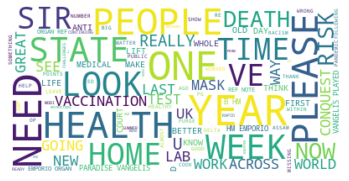

In [17]:
wordcloud_tweet(df)

In [18]:
from flask import request

In [23]:
api.search(Topic, count=100, lang="en",exclude='retweets')

[Status(_api=<tweepy.api.API object at 0x7fb1f946a8b0>, _json={'created_at': 'Wed Jun 09 16:12:23 +0000 2021', 'id': 1402659850249818113, 'id_str': '1402659850249818113', 'text': 'FL has cut back on COVID data to the public, but you can still get daily info from the feds https://t.co/sCcInOg2Fv via @flphoenixnews', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'FLPhoenixNews', 'name': 'The Florida Phoenix', 'id': 1009892540114403328, 'id_str': '1009892540114403328', 'indices': [120, 134]}], 'urls': [{'url': 'https://t.co/sCcInOg2Fv', 'expanded_url': 'https://www.floridaphoenix.com/blog/fl-has-cut-back-on-covid-data-to-the-public-but-you-can-still-get-daily-info-from-the-feds/', 'display_url': 'floridaphoenix.com/blog/fl-has-cu…', 'indices': [92, 115]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, '